In [ ]:
import duckdb
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conn_input = duckdb.connect(database='/content/drive/MyDrive/ADSDB/colabs-part2/Analytical Sandbox/complete.db', read_only=True)
conn_out = duckdb.connect('/content/drive/MyDrive/ADSDB/colabs-part2/Data Preparation/prepared_data.db')

In [ ]:
cursor = conn_input.cursor()

# Execute the query to get a list of all tables
cursor.execute("SHOW TABLES")

# Fetch all the results
tables = cursor.fetchall()

# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0])

Tables in the database:
house_price_indexes


In [ ]:
df = conn_input.execute("SELECT * FROM house_price_indexes").df()
df.head()

,Year,Quarter,Provinces,house_price_index_type,house_price_index
0,2022,2022QIV,National Total,General,142.666
1,2022,2022QIV,National Total,New dwelling,157.801
2,2022,2022QIV,National Total,Second-hand dwelling,140.353
3,2022,2022QIII,National Total,General,143.860
4,2022,2022QIII,National Total,New dwelling,154.931


In [ ]:
df['Quarter'] = df['Quarter'].str.replace('Q', '-')
def roman_to_quarter(roman):
    roman_numerals = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
    year, numeral = roman.split('-')
    quarter_number = roman_numerals[numeral]
    return f'{year}-Q{quarter_number}'

# Apply the function to the 'Quarter' column
df['Quarter'] = df['Quarter'].apply(roman_to_quarter)
df.head()

,Year,Quarter,Provinces,house_price_index_type,house_price_index
0,2022,2022-Q4,National Total,General,142.666
1,2022,2022-Q4,National Total,New dwelling,157.801
2,2022,2022-Q4,National Total,Second-hand dwelling,140.353
3,2022,2022-Q3,National Total,General,143.860
4,2022,2022-Q3,National Total,New dwelling,154.931


In [ ]:
unique_values = df['Quarter'].unique()
print(unique_values)

['2022-Q4' '2022-Q3' '2022-Q2' '2022-Q1' '2021-Q4' '2021-Q3' '2021-Q2'
 '2021-Q1' '2020-Q4' '2020-Q3' '2020-Q2' '2020-Q1' '2019-Q4' '2019-Q3'
 '2019-Q2' '2019-Q1' '2018-Q4' '2018-Q3' '2018-Q2' '2018-Q1' '2017-Q4'
 '2017-Q3' '2017-Q2' '2017-Q1' '2016-Q4' '2016-Q3' '2016-Q2' '2016-Q1'
 '2015-Q4' '2015-Q3' '2015-Q2' '2015-Q1' '2014-Q4' '2014-Q3' '2014-Q2'
 '2014-Q1' '2013-Q4' '2013-Q3' '2013-Q2' '2013-Q1' '2012-Q4' '2012-Q3'
 '2012-Q2' '2012-Q1' '2011-Q4' '2011-Q3' '2011-Q2' '2011-Q1' '2010-Q4'
 '2010-Q3' '2010-Q2' '2010-Q1' '2009-Q4' '2009-Q3' '2009-Q2' '2009-Q1'
 '2008-Q4' '2008-Q3' '2008-Q2' '2008-Q1']


In [ ]:
#df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Quarter'] = pd.to_datetime(df['Quarter'])

# Print the data types of each column
print(df.dtypes)


Year                               int64
Quarter                   datetime64[ns]
Provinces                         object
house_price_index_type            object
house_price_index                float64
dtype: object


In [ ]:
# We reduce the scope to type = general and national level
df = df[(df['house_price_index_type'] == 'General') & (df['Provinces'] == 'National Total')]
df.head()

,Year,Quarter,Provinces,house_price_index_type,house_price_index
0,2022,2022-10-01,National Total,General,142.666
3,2022,2022-07-01,National Total,General,143.860
6,2022,2022-04-01,National Total,General,141.433
9,2022,2022-01-01,National Total,General,138.742
12,2021,2021-10-01,National Total,General,135.291


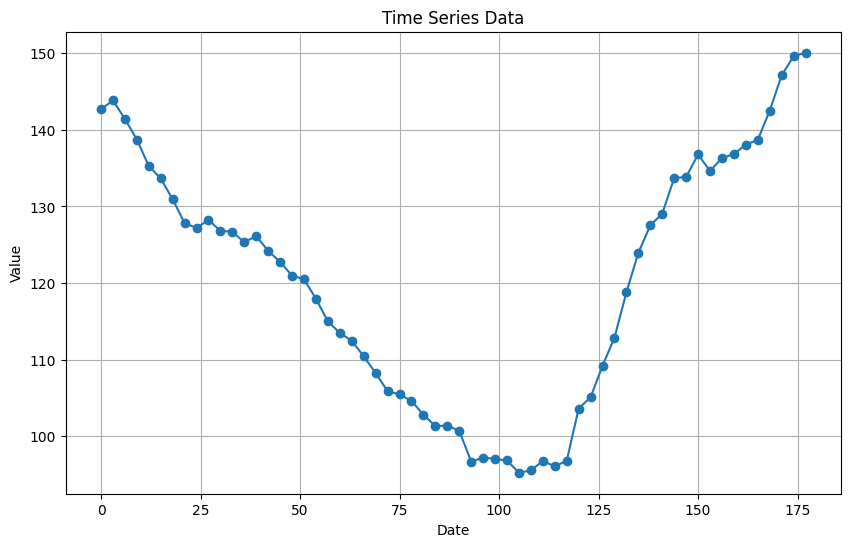

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['house_price_index'], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
# We drop all the columns that the model will not use and sort
df = df[['Quarter','house_price_index']]
df.head()

,Quarter,house_price_index
0,2022-10-01,142.666
3,2022-07-01,143.860
6,2022-04-01,141.433
9,2022-01-01,138.742
12,2021-10-01,135.291


In [ ]:
# Create table in the output database
conn_out.execute("""
CREATE OR REPLACE TABLE prepared_data AS
SELECT *
FROM df;
""")

# Print tables in conn_out
result = conn_out.execute("SHOW TABLES;")

rows = result.fetchall()
for row in rows:
    print(row[0])

prepared_data


In [ ]:
# Close and save databases

conn_input.close()
conn_out.close()